# Q2

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.integrate import solve_ivp  
from scipy.integrate import odeint

In [104]:
def f(t, z, beta_r,beta_w,gamma_r,gamma_w,T,nu,mu):
    
    s, i_w, i_r,r = z
    return [nu-s*(beta_w*i_w+beta_r*i_r)-mu*s,
            beta_w*s*i_w-(gamma_w+T)*i_w-mu*i_w,
            beta_r*s*i_r-gamma_r*i_r-mu*i_r,
            (gamma_w+T)*i_w+gamma_r*i_r-mu*r
            ]





tstart=0 
tend=100
tstep=0.1
tspan = np.arange(tstart,tend,tstep)



i0_w=0.0001
i0_r=0.0001
s0=1-i0_r-i0_w
r0=0

#beta_w=0.6
#beta_r=.6
beta_w_list=np.linspace(0,4,100)
#beta_w_list=[0.5]
mu=5.5e-5#1 /(7 * 35.0)
nu=5.5e-5#1 /(7 * 35.0)

gamma_w = 0.1#/7
gamma_r=0.1# / 2

#T_list=np.linspace(0,0.5,50)

T=0.001
#T=.01#gamma_w/10
yinit = (s0,i0_w,i0_r,r0)

y_w_inf=[]
y_r_inf=[]

#sol = solve_ivp(f,[tspan[0],tspan[-1]], yinit,method='RK45', t_eval=tspan, args=(beta_r,beta_w,gamma_r,gamma_w,T,nu,mu))
for beta_w in beta_w_list:
    sol = solve_ivp(f,[tspan[0],tspan[-1]], yinit,method='RK45', t_eval=tspan, args=(beta_r,beta_w,gamma_r,gamma_w,T,nu,mu))
    #sol=odeint(f,yinit,tspan,args=(beta_r,beta_w,gamma_r,gamma_w,T,nu,mu),tfirst=True)
    y_w_inf.append(sol.y[1][-1])
    y_r_inf.append(sol.y[2][-1])

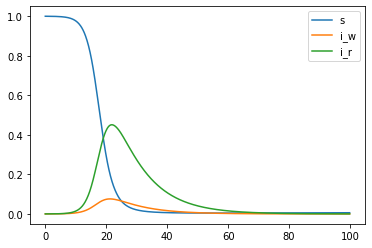

In [96]:
plt.plot(tspan,sol.y[0],label='s')
plt.plot(tspan,sol.y[1],label='i_w')
plt.plot(tspan,sol.y[2],label='i_r')
plt.legend()
#plt.yscale('log')
#plt.plot(sol.t,sol.y[1])

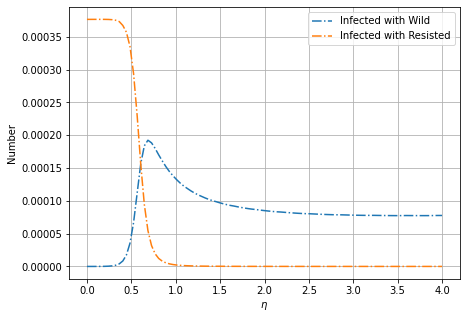

In [106]:
#beta_w_list=np.array(beta_w_list)*(gamma_w/((T+gamma_w)*beta_r))
plt.figure(figsize=(7,5))
plt.plot(beta_w_list,y_w_inf,'-.',label='Infected with Wild')
plt.plot(beta_w_list,y_r_inf,'-.',label='Infected with Resisted')
plt.grid()
plt.legend()
plt.xlabel('$\eta$')
plt.ylabel('Number')
plt.savefig('Q2.pdf',bbox_inches='tight')

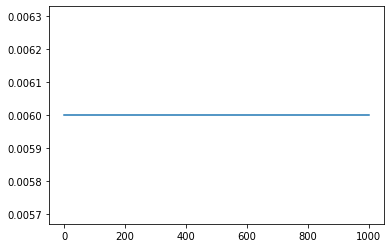

In [139]:
t=np.arange(0,1000,1)
r=(b_0+b_1*np.cos(phi+omega*t))/N_h
plt.plot(t,r)

# Q1

In [214]:
def f(t, z, nu_h,mu_h,t_hm,gamma_h,nu_m,mu_m,t_mh,b_0,b_1,phi,omega,N_h):
    r=(b_0+b_1*np.cos(phi+omega*t))/N_h
    x_h, y_h,z_h,x_m,y_m= z
    return [nu_h-r*t_hm*y_m*x_h-mu_h*x_h,
            r*t_hm*y_m*x_h-mu_h*y_h-gamma_h*y_h,
            gamma_h*y_h-mu_h*z_h,
            nu_m-r*t_mh*y_h*x_m-mu_m*x_m,
            r*t_mh*y_h*x_m-mu_m*y_m
            ]

#def r(b_0,b_1,phi,omega,N_h,t):
 #   return (b_0+b_1*np.cos(phi+omega*t))/N_h

tstart=0 
tend=2000
tstep=0.01
tspan = np.arange(tstart,tend,tstep)





N_h=1000
mu_h=1/(70*365)
nu_h=mu_h*N_h
t_hm=0.3
gamma_h=1/45 

N_m=10*N_h
mu_m=1/7
nu_m=mu_m*N_m
t_mh=0.6


b_0=4
b_1=2
phi=0
omega=2*np.pi/500
x_h0=N_h
y_h0=0
z_h0=N_h-x_h0-y_h0

y_m0=1e-3*N_m
x_m0=N_m-y_m0

yinit = (x_h0,y_h0,z_h0,x_m0,y_m0)

sol = solve_ivp(f,[tspan[0],tspan[-1]], yinit, t_eval=tspan, args=(nu_h,mu_h,t_hm,gamma_h,nu_m,mu_m,t_mh,b_0,b_1,phi,omega,N_h))

Text(0, 0.5, 'Numbers')

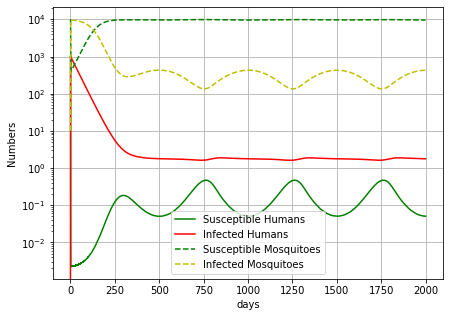

In [215]:
start=5000
end=9000
plt.figure(figsize=(7,5))
plt.plot(sol.t,sol.y[0],'g',label='Susceptible Humans')
plt.plot(sol.t,sol.y[1],'r',label='Infected Humans')
plt.plot(sol.t,sol.y[3],'--g',label='Susceptible Mosquitoes')
plt.plot(sol.t,sol.y[4],'--y',label='Infected Mosquitoes')
plt.yscale('log')
plt.grid()
plt.legend()
plt.xlabel('days')
plt.ylabel('Numbers')
#plt.savefig('Q1.pdf',bbox_inches='tight')

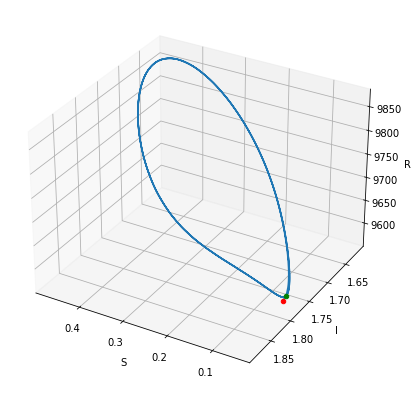

In [220]:
from mpl_toolkits.mplot3d import Axes3D
start=50000
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d',xlabel='S',ylabel='I',zlabel='R')
ax.plot(sol.y[0][start:], sol.y[1][start:],sol.y[3][start:])
ax.scatter(sol.y[0][start], sol.y[1][start],sol.y[3][start],color='r')
ax.scatter(sol.y[0][-1], sol.y[1][-1],sol.y[3][-1],color='g')
ax.view_init(30,120)

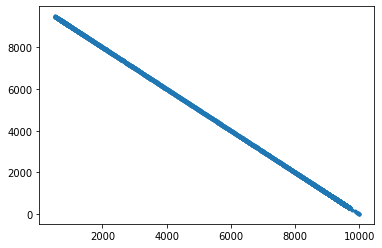

In [51]:
plt.plot(sol.y[3], sol.y[4],'.')

Text(0, 0.5, 'Numbers')

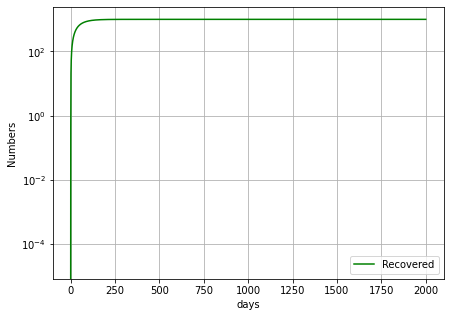

In [207]:
plt.figure(figsize=(7,5))
plt.plot(sol.t,sol.y[2],'g',label='Recovered')
plt.yscale('log')
plt.grid()
plt.legend()
plt.xlabel('days')
plt.ylabel('Numbers')
#plt.savefig('Q1 R.pdf',bbox_inches='tight')

Text(0, 0.5, 'Numbers')

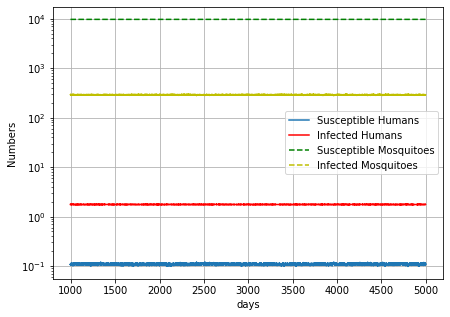

In [52]:
ns=9950
plt.figure(figsize=(7,5))
plt.plot(sol.t[ns:],sol.y[0][ns:],'-',label='Susceptible Humans')
plt.plot(sol.t[ns:],sol.y[1][ns:],'r',label='Infected Humans')
plt.plot(sol.t[ns:],sol.y[3][ns:],'--g',label='Susceptible Mosquitoes')
plt.plot(sol.t[ns:],sol.y[4][ns:],'--y',label='Infected Mosquitoes')
plt.yscale('log')
plt.grid()
plt.legend()
plt.xlabel('days')
plt.ylabel('Numbers')
#plt.savefig('inf Q1.pdf',bbox_inches='tight')

In [197]:
sol.y[0]

array([1.00000000e+03, 9.98066840e+02, 9.95424438e+02, ...,
       1.07211513e-01, 1.07619621e-01, 1.06974960e-01])

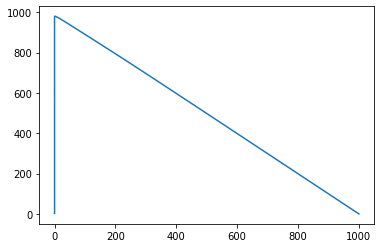

In [195]:
plt.plot(sol.y[0],sol.y[1])

# Bonus

In [118]:
def f(t, z, nu_h,mu_h,gamma_h,nu_m,mu_m,b_0,b_1,phi,omega,N_h,omega_hm):
    r=(b_0+b_1*np.cos(phi+omega*t))/N_h
    t_hm=0.3*np.sin(omega_hm*t)+0.4
    t_mh=0.6*np.sin(omega_hm*t)+0.8
    x_h, y_h,z_h,x_m,y_m= z
    return [nu_h-r*t_hm*y_m*x_h-mu_h*x_h,
            r*t_hm*y_m*x_h-mu_h*y_h-gamma_h*y_h,
            gamma_h*y_h-mu_h*z_h,
            nu_m-r*t_mh*y_h*x_m-mu_m*x_m,
            r*t_mh*y_h*x_m-mu_m*y_m
            ]

#def r(b_0,b_1,phi,omega,N_h,t):
 #   return (b_0+b_1*np.cos(phi+omega*t))/N_h

tstart=0 
tend=2000
tstep=1
tspan = np.arange(tstart,tend,tstep)





N_h=1000
mu_h=1/(70*365)
nu_h=mu_h*N_h
#t_hm=0.3
gamma_h=1/45 

N_m=10*N_h
mu_m=1/7
nu_m=mu_m*N_m
#t_mh=0.6


b_0=4
b_1=2
phi=0
omega=2*np.pi

omega_hm=2*np.pi/180
x_h0=N_h
y_h0=0
z_h0=N_h-x_h0-y_h0

y_m0=1e-3*N_m
x_m0=N_m-y_m0

yinit = (x_h0,y_h0,z_h0,x_m0,y_m0)

sol = solve_ivp(f,[tspan[0],tspan[-1]], yinit, t_eval=tspan, args=(nu_h,mu_h,gamma_h,nu_m,mu_m,b_0,b_1,phi,omega,N_h,omega_hm))

Text(0, 0.5, 'Numbers')

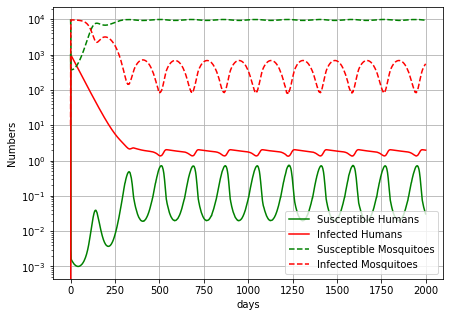

In [146]:
plt.figure(figsize=(7,5))
plt.plot(sol.t,sol.y[0],'g',label='Susceptible Humans')
plt.plot(sol.t,sol.y[1],'r',label='Infected Humans')
plt.plot(sol.t,sol.y[3],'--g',label='Susceptible Mosquitoes')
plt.plot(sol.t,sol.y[4],'--r',label='Infected Mosquitoes')
plt.yscale('log')
plt.grid()
plt.legend()
plt.xlabel('days')
plt.ylabel('Numbers')

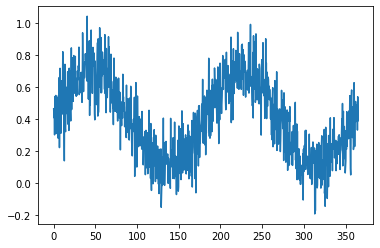

In [144]:
t=np.linspace(0,365,1000)
ran=np.random.normal(scale=0.12,size=(1000))
plt.plot(t,0.3*np.sin(omega_hm*t)+0.4+ran)

In [139]:
np.random.normal(size=(100))

array([ 0.06455126,  0.98153916, -0.55831475, -0.34877958, -0.11177771,
       -1.36966002,  0.25306935, -0.23547629, -0.85239377, -0.23238966,
        0.71764932, -1.24609599, -1.85267317, -0.41376629, -0.55389221,
       -0.14649272, -0.13078711, -0.49748127,  0.44342963,  0.79881293,
        1.54993759,  0.25358286,  0.41906388, -0.78825414,  0.12758122,
        0.83757756,  0.58692235,  0.52431403,  1.49102167, -0.27151454,
        0.26125243,  0.03041092, -0.20686487,  0.33277986,  0.88607409,
       -0.99575678, -0.82110988,  0.18930483,  2.5460772 ,  0.09976526,
        1.2769036 ,  1.47834959,  0.61480238,  0.77819545, -0.58154217,
        0.67221668,  0.27600432,  1.18108786,  0.32633232, -0.34926786,
        0.91824558,  1.76831928,  0.94465068, -0.10914697, -0.18168307,
        0.13681902, -0.515633  ,  0.30408901,  1.03088065, -0.70049   ,
       -0.39045547, -0.07426485, -0.47345895,  0.90150518,  0.22203108,
       -0.06732995, -1.28786421,  0.69168753,  1.09735456,  0.37